<a href="https://colab.research.google.com/github/27804balaji/Pytorch/blob/main/PyTorch_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises Fundamentals

**Link :-** https://www.learnpytorch.io/00_pytorch_fundamentals/#exercises

## Exercise 1

Create a random tensor with shape (7, 7).

In [ ]:
import torch

tensor = torch.rand(49).reshape(7, 7)
tensor.shape

torch.Size([7, 7])

## Excersie 2

Perform a matrix multiplication on the tensor from exercise 1 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [ ]:
x_tensor = torch.rand(7).reshape(1, 7)
x_tensor @ tensor

tensor([[2.1065, 1.9554, 1.3832, 1.8982, 1.7134, 1.2936, 2.2299]])

## Exercise 3

Set the random seed to 0 and do exercises 2 & 3 over again.

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
if device == 'cuda':
  torch.cuda.manual_seed(0)

else:
  torch.manual_seed(0)

x_tensor = torch.rand(7).reshape(1, 7)
y_tensor = torch.rand(49).reshape(7, 7)

x_tensor @ y_tensor

tensor([[1.3927, 1.1957, 1.8298, 1.6661, 1.4186, 1.4219, 0.9826]])

## Excercise 4

Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
import torch

if device == 'cuda':
  torch.cuda.manual_seed(1234)

else:
  torch.manual_seed(0)

x_tensor = torch.rand(6).reshape(2, 3)
y_tensor = torch.rand(6).reshape(2, 3)

x_tensor, y_tensor

(tensor([[0.4963, 0.7682, 0.0885],
         [0.1320, 0.3074, 0.6341]]),
 tensor([[0.4901, 0.8964, 0.4556],
         [0.6323, 0.3489, 0.4017]]))

## Excercise 5

Perform a matrix multiplication on the tensors you created in excercise 4 (again, you may have to adjust the shapes of one of the tensors).

In [ ]:
matmul = x_tensor @ x_tensor.reshape(3, 2)
matmul

tensor([[0.3414, 0.5388],
        [0.2877, 0.5441]])

## Excercise 6

Find the maximum and minimum values of the output of excercise 5.

In [ ]:
torch.max(matmul)

tensor(0.5441)

In [ ]:
torch.min(matmul)

tensor(0.2877)

# Excercise 7

Find the maximum and minimum index values of the output of excercise 5

In [ ]:
torch.argmax(matmul)

tensor(3)

In [ ]:
torch.argmin(matmul)

tensor(2)

# Excercise 8

Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [ ]:
import torch

import torch

if device == 'cuda':
  torch.cuda.manual_seed(7)

else:
  torch.manual_seed(7)

x_tensor = torch.rand(10).reshape(1, 1, 1, 10)
y_tensor = x_tensor.squeeze()

x_tensor == y_tensor, x_tensor.shape, y_tensor

(tensor([[[[True, True, True, True, True, True, True, True, True, True]]]]),
 torch.Size([1, 1, 1, 10]),
 tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]))

# Excercise PyTorch Workflow

## Excercise 1

* Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [ ]:
import torch

start = 0
end = 1
step = 0.001

x = torch.arange(start, end, step)
x, len(x)

(tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
         0.0090, 0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170,
         0.0180, 0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260,
         0.0270, 0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350,
         0.0360, 0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440,
         0.0450, 0.0460, 0.0470, 0.0480, 0.0490, 0.0500, 0.0510, 0.0520, 0.0530,
         0.0540, 0.0550, 0.0560, 0.0570, 0.0580, 0.0590, 0.0600, 0.0610, 0.0620,
         0.0630, 0.0640, 0.0650, 0.0660, 0.0670, 0.0680, 0.0690, 0.0700, 0.0710,
         0.0720, 0.0730, 0.0740, 0.0750, 0.0760, 0.0770, 0.0780, 0.0790, 0.0800,
         0.0810, 0.0820, 0.0830, 0.0840, 0.0850, 0.0860, 0.0870, 0.0880, 0.0890,
         0.0900, 0.0910, 0.0920, 0.0930, 0.0940, 0.0950, 0.0960, 0.0970, 0.0980,
         0.0990, 0.1000, 0.1010, 0.1020, 0.1030, 0.1040, 0.1050, 0.1060, 0.1070,
         0.1080, 0.1090, 0.1

In [ ]:
weight = 0.3
bias = 0.9

y = weight * x + bias
y, len(y)

(tensor([0.9000, 0.9003, 0.9006, 0.9009, 0.9012, 0.9015, 0.9018, 0.9021, 0.9024,
         0.9027, 0.9030, 0.9033, 0.9036, 0.9039, 0.9042, 0.9045, 0.9048, 0.9051,
         0.9054, 0.9057, 0.9060, 0.9063, 0.9066, 0.9069, 0.9072, 0.9075, 0.9078,
         0.9081, 0.9084, 0.9087, 0.9090, 0.9093, 0.9096, 0.9099, 0.9102, 0.9105,
         0.9108, 0.9111, 0.9114, 0.9117, 0.9120, 0.9123, 0.9126, 0.9129, 0.9132,
         0.9135, 0.9138, 0.9141, 0.9144, 0.9147, 0.9150, 0.9153, 0.9156, 0.9159,
         0.9162, 0.9165, 0.9168, 0.9171, 0.9174, 0.9177, 0.9180, 0.9183, 0.9186,
         0.9189, 0.9192, 0.9195, 0.9198, 0.9201, 0.9204, 0.9207, 0.9210, 0.9213,
         0.9216, 0.9219, 0.9222, 0.9225, 0.9228, 0.9231, 0.9234, 0.9237, 0.9240,
         0.9243, 0.9246, 0.9249, 0.9252, 0.9255, 0.9258, 0.9261, 0.9264, 0.9267,
         0.9270, 0.9273, 0.9276, 0.9279, 0.9282, 0.9285, 0.9288, 0.9291, 0.9294,
         0.9297, 0.9300, 0.9303, 0.9306, 0.9309, 0.9312, 0.9315, 0.9318, 0.9321,
         0.9324, 0.9327, 0.9

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'X' : x,
    'Y' : y
})

data.head(10)

,X,Y
0,0.000,0.9000
1,0.001,0.9003
2,0.002,0.9006
3,0.003,0.9009
4,0.004,0.9012
5,0.005,0.9015
6,0.006,0.9018
7,0.007,0.9021
8,0.008,0.9024
9,0.009,0.9027


In [ ]:
train_split = int(0.8 * len(data))
train_split

800

In [ ]:
x_train, y_train = data.X[:train_split], data.Y[:train_split]
x_test, y_test = data.Y[train_split:], data.Y[train_split:]

In [ ]:
import matplotlib.pyplot as plt

def plot(train_data,
         train_label,
         test_label,
         test_data):
  plt.figure(figsize = (7, 7))
  plt.scatter(train_data, train_label, color = 'g', s = 5, label = 'Train Data')
  plt.scatter(test_data, test_label, color = 'r', s = 5, label = 'Test Data')
  plt.legend(prop = {'size' : 10})
  # plt.axis(False)
  plt.show()

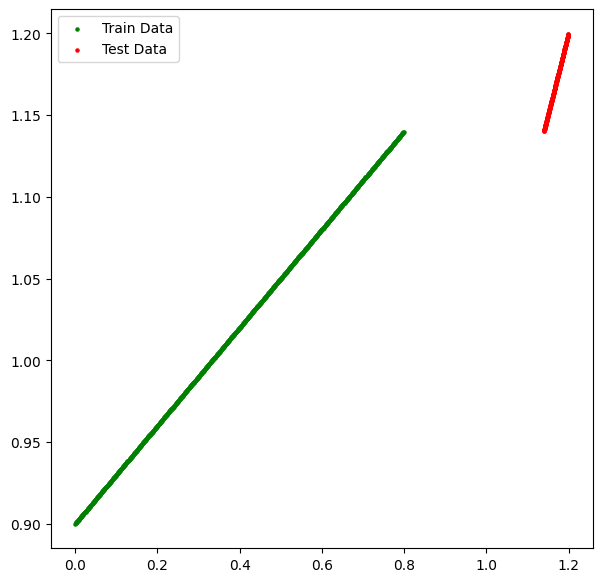

In [ ]:
plot(
      train_data = x_train,
      train_label = y_train,
      test_data = x_test,
      test_label = y_test)

## Excercise 2

* Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from torch import nn

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1,
                                          requires_grad = True,
                                          dtype = torch.float32))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float32))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

  def save(self, path):
    torch.save(self.state_dict(), path)

In [ ]:
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

## Excercise 3

* Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in excercise 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
weight = 0.3
bias = 0.9

strat = 0
end = 1
step = 0.001

x = torch.arange(start, end, step)
y = weight * x + bias

len(x), len(x)

(1000, 1000)

In [ ]:
trainig_split = int(0.8 * len(x))
train_split

800

In [ ]:
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]


print(len(x_train), len(y_train), len(x_test), len(y_test))

800 800 200 200


In [ ]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr= 0.01)

In [ ]:
from torch import nn

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)


# Trainig and Testing loop...

epochs = 300
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
model = model.to(device)

for epoch in range(epochs):
  # Training...
  model.train()

  y_pred = model(x_train)
  train_loss = loss_fn(y_pred, y_train)

  # optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Testing...
  model.eval()

  test_pred = model(x_test)
  test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    print(f'Epoch : {epoch} | Training Loss : {train_loss:.4f} | Testing Loss : {test_loss:.4f}')

Epoch : 0 | Training Loss : 0.2476 | Testing Loss : 0.5252
Epoch : 20 | Training Loss : 0.0757 | Testing Loss : 0.2619
Epoch : 40 | Training Loss : 0.2279 | Testing Loss : 0.2230
Epoch : 60 | Training Loss : 0.1140 | Testing Loss : 0.3325
Epoch : 80 | Training Loss : 0.2373 | Testing Loss : 0.0211
Epoch : 100 | Training Loss : 0.1001 | Testing Loss : 0.1297
Epoch : 120 | Training Loss : 0.2436 | Testing Loss : 0.3928
Epoch : 140 | Training Loss : 0.0726 | Testing Loss : 0.1015
Epoch : 160 | Training Loss : 0.2329 | Testing Loss : 0.4374
Epoch : 180 | Training Loss : 0.1155 | Testing Loss : 0.3916
Epoch : 200 | Training Loss : 0.2450 | Testing Loss : 0.0899
Epoch : 220 | Training Loss : 0.0701 | Testing Loss : 0.1108
Epoch : 240 | Training Loss : 0.2384 | Testing Loss : 0.1295
Epoch : 260 | Training Loss : 0.1023 | Testing Loss : 0.0789
Epoch : 280 | Training Loss : 0.2610 | Testing Loss : 0.5318


## Excercise 4

* Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)

y_pred == y_test

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [ ]:
import matplotlib.pyplot as plt

def plot(train_label,
         train_data,
         test_data,
         test_label,
         prediction = None):
  plt.scatter(train_data, train_label, color = 'b', s = 3, label = 'Training Data')
  plt.scatter(test_data, test_label, color = 'g', s =3, label = 'Testing Data')

  if prediction is not None:
    if isinstance(prediction, torch.Tensor):
        prediction = prediction.cpu()
    plt.scatter(test_data, prediction, color = 'r', s = 3, label = 'Prediction')

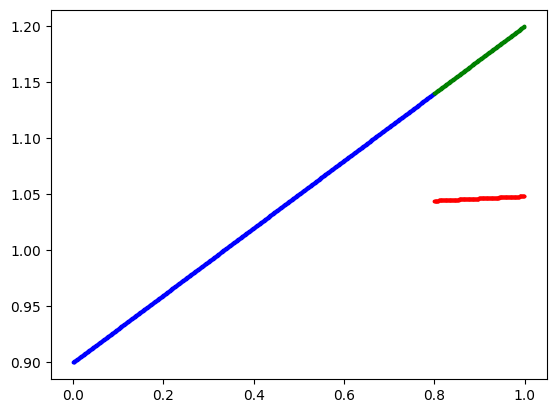

In [ ]:
plot(train_data = x_train.cpu(),
     train_label = y_train.cpu(),
     test_data = x_test.cpu(),
     test_label = y_test.cpu(),
     prediction = y_pred
     )

## Excercise 5

* Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
model.save('LinearModel.pth')

In [ ]:
loaded_model = torch.load('/content/LinearModel.pth')
mode_1 = model.load_state_dict(loaded_model)
mode_1

<All keys matched successfully>

In [ ]:
with torch.inference_mode():
  y_pred = model(x_test)

y_test[:10] == y_pred[:10]

tensor([False, False, False, False, False, False, False, False, False, False])